In [ ]:
# Run these 2 following lines when running on Google Colab environment
# !git clone https://github.com/tripercy/pka-deeplearning-midterm.git
# %cd pka-deeplearning-midterm

In [ ]:
!cd data && bash download.sh

In [21]:
from utils.data_loader import *
base_path = "data/bbc"

x, y, labels = read_bbc(base_path)

In [1]:
from utils.preprocess import *
from utils.vectorizer import *
import gensim.downloader as api

In [24]:
embedding_model = api.load("glove-twitter-25")

In [44]:
preprocessed = preprocess_ds(x)
vectorized = vectorize_ds(preprocessed, embedding_model, 100)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(vectorized, y, 0.8)

In [27]:
# truncate train data for testing
# x_train = x_train[:500]
# y_train = y_train[:500]

In [34]:
from model import base_model
from model.layers.activation import *
from model.layers.loss_function import *
from model.layers import dense_layer, pooling_layer, input_layer, residual_layer, layernorm_layer
from model.optimizers import gradient_descent, adam_optimizer

In [40]:
inp = input_layer.InputLayer(25)
dense1 = dense_layer.DenseLayer(inp, 64, sigmoid_forward, sigmoid_backward)
res1 = residual_layer.ResidualLayer(dense1)

skipped1 = dense_layer.DenseLayer(res1, 64, sigmoid_forward, sigmoid_backward)
skipped2 = dense_layer.DenseLayer(skipped1, 64, sigmoid_forward, sigmoid_backward)
res1.add_skipped_layers(skipped2)

norm = layernorm_layer.LayerNormLayer(res1)
avg = pooling_layer.AverageLayer(norm)
out = dense_layer.DenseLayer(avg, 5, softmax_forward, softmax_backward)

nn_model = base_model.BaseModel(
    inp, out,
    64,
    adam_optimizer.AdamOpt(alpha=0.001),
    cross_entropy_loss, cross_entropy_grad)

In [45]:
nn_model.reset()
nn_model.fit(x_train, y_train, epochs=100)

Epoch 1/100


100%|██████████| 28/28.0 [00:02<00:00,  9.57it/s]


Loss: 1.5552273650892778
Epoch 2/100


100%|██████████| 28/28.0 [00:02<00:00, 10.25it/s]


Loss: 1.06167239193111
Epoch 3/100


100%|██████████| 28/28.0 [00:02<00:00, 10.22it/s]


Loss: 0.8504231014603872
Epoch 4/100


100%|██████████| 28/28.0 [00:02<00:00, 10.23it/s]


Loss: 0.7308179310811803
Epoch 5/100


100%|██████████| 28/28.0 [00:02<00:00, 10.20it/s]


Loss: 0.6527689586467768
Epoch 6/100


100%|██████████| 28/28.0 [00:02<00:00, 10.19it/s]


Loss: 0.5976989341841549
Epoch 7/100


100%|██████████| 28/28.0 [00:02<00:00, 10.24it/s]


Loss: 0.5566529430449675
Epoch 8/100


100%|██████████| 28/28.0 [00:02<00:00, 10.31it/s]


Loss: 0.5248170484039816
Epoch 9/100


100%|██████████| 28/28.0 [00:02<00:00,  9.77it/s]


Loss: 0.4993231584988381
Epoch 10/100


100%|██████████| 28/28.0 [00:02<00:00, 10.02it/s]


Loss: 0.47838585113721804
Epoch 11/100


100%|██████████| 28/28.0 [00:02<00:00,  9.54it/s]


Loss: 0.4608290502648392
Epoch 12/100


100%|██████████| 28/28.0 [00:02<00:00,  9.73it/s]


Loss: 0.4458476953105894
Epoch 13/100


100%|██████████| 28/28.0 [00:02<00:00, 10.11it/s]


Loss: 0.4328728500023048
Epoch 14/100


100%|██████████| 28/28.0 [00:02<00:00, 10.14it/s]


Loss: 0.42149156015148975
Epoch 15/100


100%|██████████| 28/28.0 [00:02<00:00, 10.12it/s]


Loss: 0.4113970975029194
Epoch 16/100


100%|██████████| 28/28.0 [00:02<00:00, 10.21it/s]


Loss: 0.4023570414985732
Epoch 17/100


100%|██████████| 28/28.0 [00:02<00:00, 10.06it/s]


Loss: 0.3941921603495858
Epoch 18/100


100%|██████████| 28/28.0 [00:02<00:00,  9.98it/s]


Loss: 0.38676207257023937
Epoch 19/100


100%|██████████| 28/28.0 [00:02<00:00, 10.20it/s]


Loss: 0.37995528741637613
Epoch 20/100


100%|██████████| 28/28.0 [00:02<00:00, 10.07it/s]


Loss: 0.37368214541161143
Epoch 21/100


100%|██████████| 28/28.0 [00:02<00:00,  9.99it/s]


Loss: 0.36786972312028293
Epoch 22/100


100%|██████████| 28/28.0 [00:02<00:00,  9.98it/s]


Loss: 0.3624580956774691
Epoch 23/100


100%|██████████| 28/28.0 [00:02<00:00,  9.53it/s]


Loss: 0.35739755508792015
Epoch 24/100


100%|██████████| 28/28.0 [00:02<00:00,  9.54it/s]


Loss: 0.3526465124885198
Epoch 25/100


100%|██████████| 28/28.0 [00:02<00:00,  9.91it/s]


Loss: 0.3481698972123239
Epoch 26/100


100%|██████████| 28/28.0 [00:02<00:00, 10.12it/s]


Loss: 0.3439379216206523
Epoch 27/100


100%|██████████| 28/28.0 [00:02<00:00, 10.10it/s]


Loss: 0.33992511855728325
Epoch 28/100


100%|██████████| 28/28.0 [00:02<00:00, 10.04it/s]


Loss: 0.33610958426730475
Epoch 29/100


100%|██████████| 28/28.0 [00:02<00:00,  9.95it/s]


Loss: 0.3324723777074473
Epoch 30/100


100%|██████████| 28/28.0 [00:02<00:00, 10.10it/s]


Loss: 0.32899703992271273
Epoch 31/100


100%|██████████| 28/28.0 [00:02<00:00,  9.97it/s]


Loss: 0.3256692062603391
Epoch 32/100


100%|██████████| 28/28.0 [00:02<00:00,  9.81it/s]


Loss: 0.32247629076587103
Epoch 33/100


100%|██████████| 28/28.0 [00:03<00:00,  9.25it/s]


Loss: 0.31940722693222573
Epoch 34/100


100%|██████████| 28/28.0 [00:02<00:00, 10.53it/s]


Loss: 0.3164522525935629
Epoch 35/100


100%|██████████| 28/28.0 [00:02<00:00, 10.71it/s]


Loss: 0.3136027295519891
Epoch 36/100


100%|██████████| 28/28.0 [00:02<00:00, 10.46it/s]


Loss: 0.3108509907527125
Epoch 37/100


100%|██████████| 28/28.0 [00:02<00:00,  9.46it/s]


Loss: 0.30819020963381755
Epoch 38/100


100%|██████████| 28/28.0 [00:02<00:00,  9.56it/s]


Loss: 0.30561428773544463
Epoch 39/100


100%|██████████| 28/28.0 [00:02<00:00,  9.88it/s]


Loss: 0.303117757766577
Epoch 40/100


100%|██████████| 28/28.0 [00:02<00:00, 10.07it/s]


Loss: 0.3006957000852649
Epoch 41/100


100%|██████████| 28/28.0 [00:02<00:00, 10.09it/s]


Loss: 0.2983436709657398
Epoch 42/100


100%|██████████| 28/28.0 [00:02<00:00, 10.16it/s]


Loss: 0.29605764117338634
Epoch 43/100


100%|██████████| 28/28.0 [00:02<00:00, 10.11it/s]


Loss: 0.29383394336705315
Epoch 44/100


100%|██████████| 28/28.0 [00:02<00:00, 10.17it/s]


Loss: 0.29166922683699237
Epoch 45/100


100%|██████████| 28/28.0 [00:02<00:00, 10.15it/s]


Loss: 0.289560418176624
Epoch 46/100


100%|██████████| 28/28.0 [00:02<00:00, 10.10it/s]


Loss: 0.2875046867223499
Epoch 47/100


100%|██████████| 28/28.0 [00:02<00:00,  9.68it/s]


Loss: 0.2854994139466957
Epoch 48/100


100%|██████████| 28/28.0 [00:02<00:00, 10.00it/s]


Loss: 0.283542166368878
Epoch 49/100


100%|██████████| 28/28.0 [00:02<00:00, 10.07it/s]


Loss: 0.28163067185136037
Epoch 50/100


100%|██████████| 28/28.0 [00:02<00:00,  9.80it/s]


Loss: 0.27976279930779585
Epoch 51/100


100%|██████████| 28/28.0 [00:02<00:00,  9.47it/s]


Loss: 0.2779365418399969
Epoch 52/100


100%|██████████| 28/28.0 [00:02<00:00,  9.86it/s]


Loss: 0.2761500031889941
Epoch 53/100


100%|██████████| 28/28.0 [00:02<00:00,  9.80it/s]


Loss: 0.27440138720087504
Epoch 54/100


100%|██████████| 28/28.0 [00:02<00:00, 10.18it/s]


Loss: 0.2726889898454166
Epoch 55/100


100%|██████████| 28/28.0 [00:02<00:00, 10.20it/s]


Loss: 0.2710111932328033
Epoch 56/100


100%|██████████| 28/28.0 [00:02<00:00,  9.56it/s]


Loss: 0.269366461064914
Epoch 57/100


100%|██████████| 28/28.0 [00:02<00:00,  9.73it/s]


Loss: 0.2677533350186566
Epoch 58/100


100%|██████████| 28/28.0 [00:02<00:00,  9.95it/s]


Loss: 0.2661704316613674
Epoch 59/100


100%|██████████| 28/28.0 [00:02<00:00, 10.71it/s]


Loss: 0.264616439613329
Epoch 60/100


100%|██████████| 28/28.0 [00:02<00:00, 10.04it/s]


Loss: 0.26309011677829824
Epoch 61/100


100%|██████████| 28/28.0 [00:02<00:00, 10.62it/s]


Loss: 0.26159028754774827
Epoch 62/100


100%|██████████| 28/28.0 [00:02<00:00, 10.16it/s]


Loss: 0.2601158399449085
Epoch 63/100


100%|██████████| 28/28.0 [00:03<00:00,  8.75it/s]


Loss: 0.2586657227127449
Epoch 64/100


100%|██████████| 28/28.0 [00:02<00:00, 10.29it/s]


Loss: 0.25723894237045053
Epoch 65/100


100%|██████████| 28/28.0 [00:02<00:00, 10.49it/s]


Loss: 0.255834560271054
Epoch 66/100


100%|██████████| 28/28.0 [00:02<00:00, 10.42it/s]


Loss: 0.2544516896929925
Epoch 67/100


100%|██████████| 28/28.0 [00:02<00:00, 10.51it/s]


Loss: 0.2530894929944849
Epoch 68/100


100%|██████████| 28/28.0 [00:02<00:00, 10.19it/s]


Loss: 0.25174717885368464
Epoch 69/100


100%|██████████| 28/28.0 [00:02<00:00, 10.47it/s]


Loss: 0.25042399961142975
Epoch 70/100


100%|██████████| 28/28.0 [00:02<00:00, 10.00it/s]


Loss: 0.24911924872776128
Epoch 71/100


100%|██████████| 28/28.0 [00:02<00:00, 10.49it/s]


Loss: 0.2478322583586404
Epoch 72/100


100%|██████████| 28/28.0 [00:02<00:00, 10.15it/s]


Loss: 0.2465623970555597
Epoch 73/100


100%|██████████| 28/28.0 [00:02<00:00,  9.55it/s]


Loss: 0.24530906758795076
Epoch 74/100


100%|██████████| 28/28.0 [00:02<00:00, 10.04it/s]


Loss: 0.24407170488631452
Epoch 75/100


100%|██████████| 28/28.0 [00:02<00:00, 10.50it/s]


Loss: 0.24284977410267797
Epoch 76/100


100%|██████████| 28/28.0 [00:02<00:00, 10.52it/s]


Loss: 0.2416427687841475
Epoch 77/100


100%|██████████| 28/28.0 [00:02<00:00, 10.41it/s]


Loss: 0.24045020915486418
Epoch 78/100


100%|██████████| 28/28.0 [00:02<00:00, 10.03it/s]


Loss: 0.2392716405014295
Epoch 79/100


100%|██████████| 28/28.0 [00:02<00:00, 10.48it/s]


Loss: 0.23810663165678883
Epoch 80/100


100%|██████████| 28/28.0 [00:02<00:00, 10.30it/s]


Loss: 0.23695477357755973
Epoch 81/100


100%|██████████| 28/28.0 [00:03<00:00,  9.27it/s]


Loss: 0.23581567800982423
Epoch 82/100


100%|██████████| 28/28.0 [00:02<00:00,  9.84it/s]


Loss: 0.23468897623844573
Epoch 83/100


100%|██████████| 28/28.0 [00:02<00:00, 10.10it/s]


Loss: 0.23357431791501065
Epoch 84/100


100%|██████████| 28/28.0 [00:02<00:00, 10.49it/s]


Loss: 0.23247136995952694
Epoch 85/100


100%|██████████| 28/28.0 [00:02<00:00, 10.30it/s]


Loss: 0.23137981553104395
Epoch 86/100


100%|██████████| 28/28.0 [00:02<00:00, 10.68it/s]


Loss: 0.23029935306241583
Epoch 87/100


100%|██████████| 28/28.0 [00:02<00:00, 10.75it/s]


Loss: 0.229229695354507
Epoch 88/100


100%|██████████| 28/28.0 [00:02<00:00, 10.69it/s]


Loss: 0.22817056872526978
Epoch 89/100


100%|██████████| 28/28.0 [00:02<00:00, 10.60it/s]


Loss: 0.2271217122093066
Epoch 90/100


100%|██████████| 28/28.0 [00:02<00:00, 10.68it/s]


Loss: 0.22608287680377473
Epoch 91/100


100%|██████████| 28/28.0 [00:02<00:00, 10.72it/s]


Loss: 0.2250538247568075
Epoch 92/100


100%|██████████| 28/28.0 [00:02<00:00, 10.55it/s]


Loss: 0.22403432889499147
Epoch 93/100


100%|██████████| 28/28.0 [00:02<00:00, 10.77it/s]


Loss: 0.2230241719868626
Epoch 94/100


100%|██████████| 28/28.0 [00:02<00:00, 10.52it/s]


Loss: 0.22202314613983992
Epoch 95/100


100%|██████████| 28/28.0 [00:02<00:00, 10.57it/s]


Loss: 0.22103105222848035
Epoch 96/100


100%|██████████| 28/28.0 [00:02<00:00, 10.71it/s]


Loss: 0.2200476993524115
Epoch 97/100


100%|██████████| 28/28.0 [00:02<00:00, 10.66it/s]


Loss: 0.2190729043227318
Epoch 98/100


100%|██████████| 28/28.0 [00:02<00:00, 10.77it/s]


Loss: 0.21810649117606593
Epoch 99/100


100%|██████████| 28/28.0 [00:02<00:00, 10.50it/s]


Loss: 0.2171482907157942
Epoch 100/100


100%|██████████| 28/28.0 [00:02<00:00,  9.83it/s]

Loss: 0.21619814008023225


In [32]:
import matplotlib.pyplot as plt

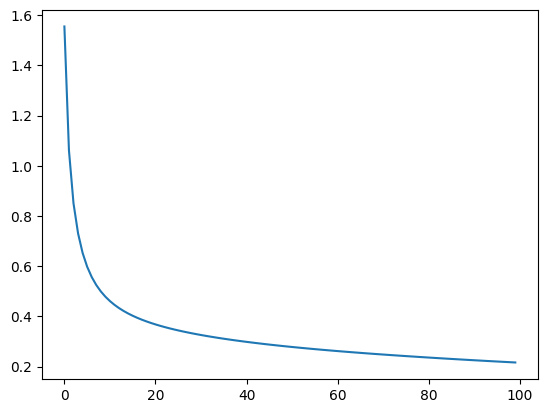

In [46]:
plt.plot(nn_model.history)

In [47]:
nn_model.evaluate(x_test, y_test)

(0.8921348314606742,
 array([0.78259654, 0.8504853 , 0.79046134, 0.93628897, 0.83660465]),
 array([0.8197658 , 0.9102166 , 0.75053011, 0.88907472, 0.83033418]))